In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Leads.csv')

In [3]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
data.shape

(9240, 37)

## 1. Data cleaning, handling missing values, handling outliers

### Removing prospect id and lead number as these columns are uniqe index type in nature and no need

In [5]:
data = data.drop(['Prospect ID','Lead Number'], axis = 1)

### As we can see in data info that there are some features lower non-null values, so eliminate those for now

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [7]:
drop_column = ['Lead Origin','Country','Specialization','How did you hear about X Education','What matters most to you in choosing a course','Tags','Lead Quality','Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Last Notable Activity']

In [8]:
data_select = data.drop(drop_column, axis=1)

In [9]:
data_select.head()

,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,...,No,No,No,No,No,No,No,No,No,No
1,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,...,No,No,No,No,No,No,No,No,No,No
2,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,No,...,No,No,No,No,No,No,No,No,No,Yes
3,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,No,...,No,No,No,No,No,No,No,No,No,No
4,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,...,No,No,No,No,No,No,No,No,No,No


In [10]:
data_select.columns

Index(['Lead Source', 'Do Not Email', 'Do Not Call', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'What is your current occupation', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview'],
      dtype='object')

### After going throuh value counts of select features, some features has yes and no values and almost 99%-100% data imbalance, so eliminating those features also

In [11]:
imbalance_columns = ['Do Not Email','Do Not Call','Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque']

In [12]:
data_select.drop(imbalance_columns, axis=1, inplace=True)
data_select.head()

,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview
0,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,No
1,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,No
2,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,Yes
3,Direct Traffic,0,1.0,305,1.0,Unreachable,Unemployed,No
4,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,No


In [13]:
data_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Source                             9204 non-null   object 
 1   Converted                               9240 non-null   int64  
 2   TotalVisits                             9103 non-null   float64
 3   Total Time Spent on Website             9240 non-null   int64  
 4   Page Views Per Visit                    9103 non-null   float64
 5   Last Activity                           9137 non-null   object 
 6   What is your current occupation         6550 non-null   object 
 7   A free copy of Mastering The Interview  9240 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 577.6+ KB


### As we see there some null values in considered features, lets remove all those rows as these are insignificant in numbers

In [14]:
data_select.isna().sum()

Lead Source                                 36
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
What is your current occupation           2690
A free copy of Mastering The Interview       0
dtype: int64

In [15]:
data_select['What is your current occupation'].fillna('Not_updated', inplace=True)

In [16]:
data_select.isna().sum()

Lead Source                                36
Converted                                   0
TotalVisits                               137
Total Time Spent on Website                 0
Page Views Per Visit                      137
Last Activity                             103
What is your current occupation             0
A free copy of Mastering The Interview      0
dtype: int64

In [17]:
data_select.dropna(inplace=True)
data_select.shape

(9074, 8)

In [18]:
data_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Source                             9074 non-null   object 
 1   Converted                               9074 non-null   int64  
 2   TotalVisits                             9074 non-null   float64
 3   Total Time Spent on Website             9074 non-null   int64  
 4   Page Views Per Visit                    9074 non-null   float64
 5   Last Activity                           9074 non-null   object 
 6   What is your current occupation         9074 non-null   object 
 7   A free copy of Mastering The Interview  9074 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 638.0+ KB


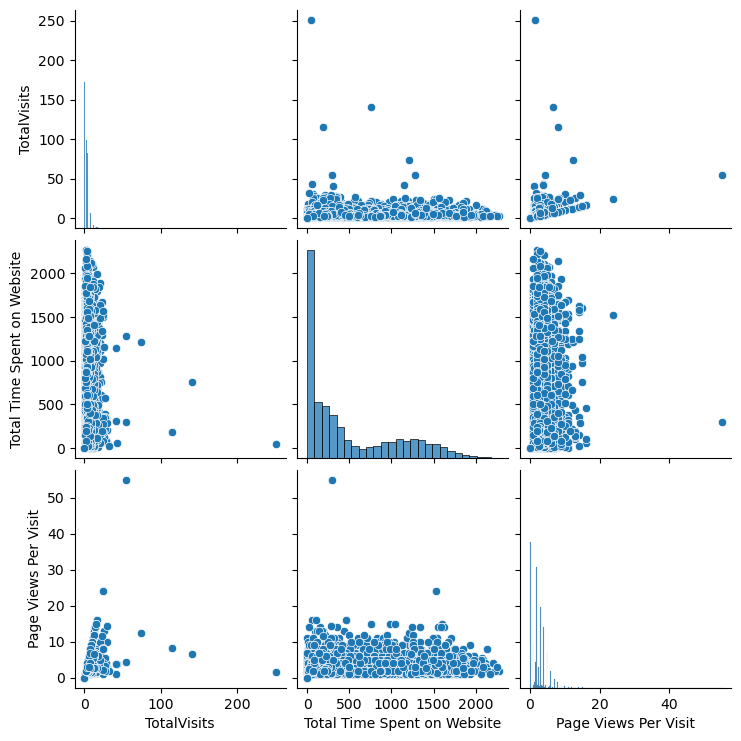

In [19]:
sns.pairplot(data_select[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
plt.show()

### Lets check for outliers

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


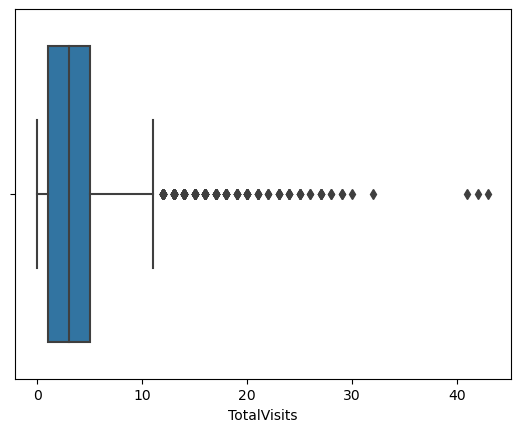

In [20]:
# We removed rows where totalvisits are above 50 as outliers

data_outlier = data_select[data_select['TotalVisits']<50]
sns.boxplot(data_outlier['TotalVisits'])
plt.show()

In [21]:
data_outlier.shape

(9068, 8)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


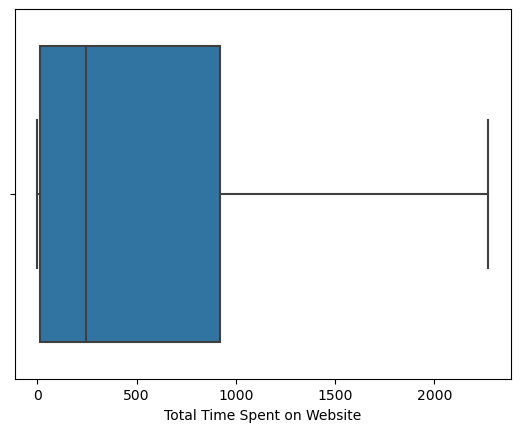

In [22]:
sns.boxplot(data_outlier['Total Time Spent on Website'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


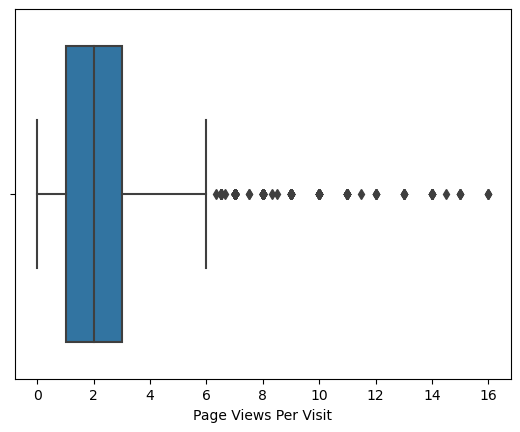

In [23]:
# We removed rows where Page views per visit are above 20 as outliers

data_outlier = data_outlier[data_outlier['Page Views Per Visit']<20]
sns.boxplot(data_outlier['Page Views Per Visit'])
plt.show()

In [24]:
data_outlier.shape

(9067, 8)

In [25]:
data_outlier.head()

,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview
0,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,No
1,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,No
2,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,Yes
3,Direct Traffic,0,1.0,305,1.0,Unreachable,Unemployed,No
4,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,No


In [26]:
data_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9067 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Source                             9067 non-null   object 
 1   Converted                               9067 non-null   int64  
 2   TotalVisits                             9067 non-null   float64
 3   Total Time Spent on Website             9067 non-null   int64  
 4   Page Views Per Visit                    9067 non-null   float64
 5   Last Activity                           9067 non-null   object 
 6   What is your current occupation         9067 non-null   object 
 7   A free copy of Mastering The Interview  9067 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 637.5+ KB


In [27]:
data_final = data_outlier

## 2. Doing EDA

In [28]:
# We got our data after treating outliers, missing values, now lets get some insights of data

In [29]:
data_final.columns

Index(['Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What is your current occupation',
       'A free copy of Mastering The Interview'],
      dtype='object')

#### Highest leads are from Google, direct

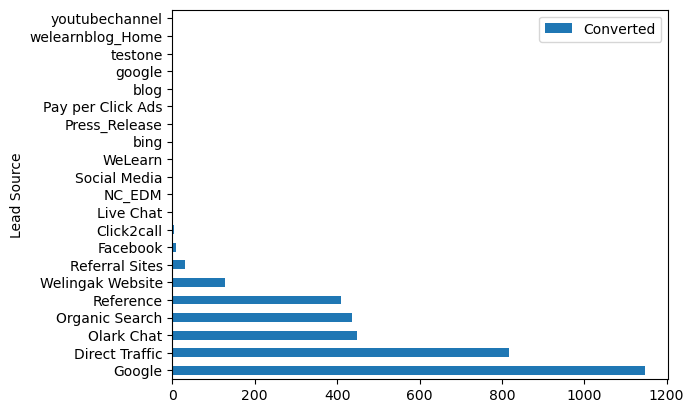

In [30]:
data_final[['Lead Source','Converted']].groupby(["Lead Source"]).sum().sort_values(by = 'Converted', ascending=False).plot.barh()
plt.show()

#### We can see more people are spending very less time on the website

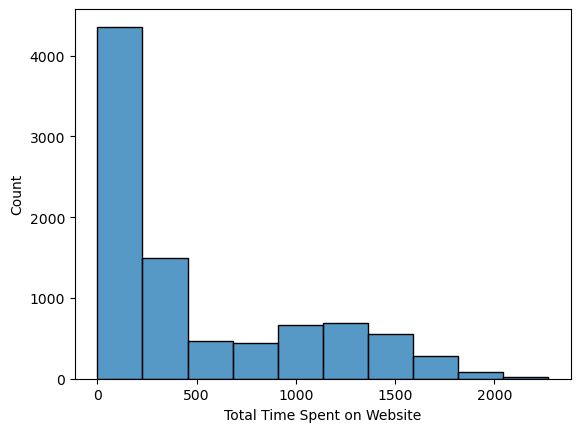

In [31]:
sns.histplot(data_final['Total Time Spent on Website'], bins=10)
plt.show()


In [32]:
data_outlier['TotalVisits'].describe()

count    9067.000000
mean        3.379949
std         3.497408
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        43.000000
Name: TotalVisits, dtype: float64

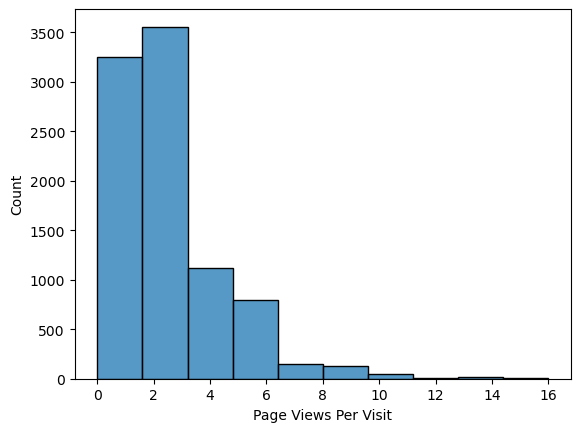

In [33]:
sns.histplot(data_final['Page Views Per Visit'], bins=10)
plt.show()

# We can see people tend to visit 2-3 pages and leave the website

#### Most of leads converetd are unemployed and working professional

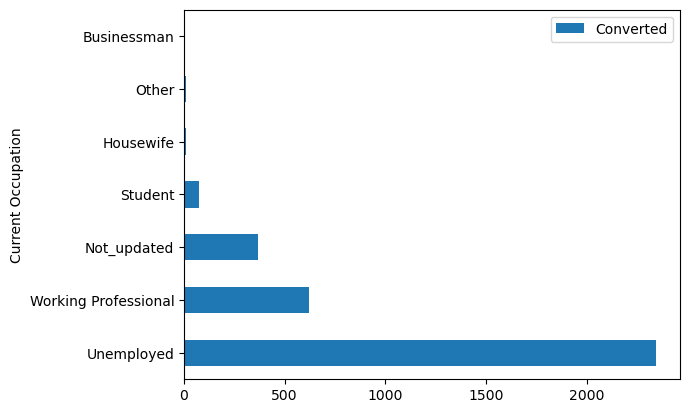

In [34]:
data_final[['What is your current occupation','Converted']].groupby(["What is your current occupation"]).sum().sort_values(by = 'Converted', ascending=False).plot.barh()
plt.ylabel('Current Occupation')
plt.show()

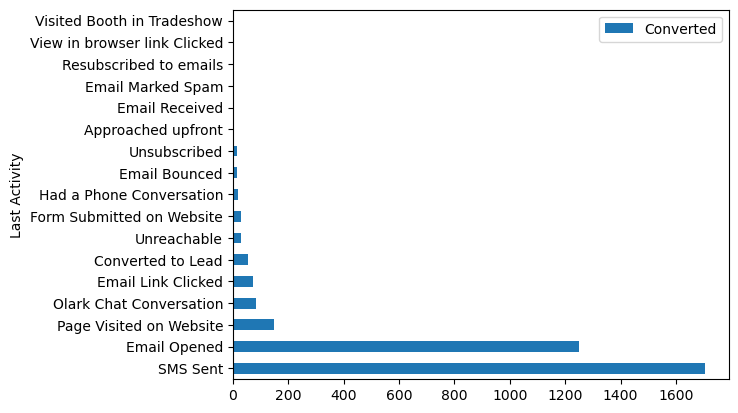

In [35]:
data_final[['Last Activity','Converted']].groupby(["Last Activity"]).sum().sort_values(by = 'Converted', ascending=False).plot.barh()

plt.show()

In [36]:
data_final.shape

(9067, 8)

### 3. Data preparation creating dummy variables, scaling numeric variables

In [37]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
data_dummy = pd.get_dummies(data_final[['Lead Source', 'Last Activity', 'What is your current occupation']], drop_first=True)

# Adding the results to the master dataframe
data_final = pd.concat([data_final, data_dummy], axis=1)

In [38]:
# We have created dummies for the below variables, so we can drop them
data_final = data_final.drop(['Lead Source', 'Last Activity', 'What is your current occupation'], 1)

C:\Users\HP\AppData\Local\Temp\ipykernel_19200\566490658.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_final = data_final.drop(['Lead Source', 'Last Activity', 'What is your current occupation'], 1)


In [39]:
data_final.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,...,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Not_updated,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0.0,0,0.0,No,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,No,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,Yes,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,No,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,No,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [40]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
data_final[varlist] = data_final[varlist].apply(binary_map)

In [41]:
data_final.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,...,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Not_updated,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

data_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(data_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

data_final.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,...,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Not_updated,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,-0.966469,-0.885366,-1.138182,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0.463240,0.350945,0.067722,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,-0.394585,1.924765,-0.173459,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,-0.680527,-0.325908,-0.655820,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,-0.394585,1.733999,-0.655820,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [44]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9067 entries, 0 to 9239
Data columns (total 47 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9067 non-null   int64  
 1   TotalVisits                                           9067 non-null   float64
 2   Total Time Spent on Website                           9067 non-null   float64
 3   Page Views Per Visit                                  9067 non-null   float64
 4   A free copy of Mastering The Interview                9067 non-null   int64  
 5   Lead Source_Direct Traffic                            9067 non-null   uint8  
 6   Lead Source_Facebook                                  9067 non-null   uint8  
 7   Lead Source_Google                                    9067 non-null   uint8  
 8   Lead Source_Live Chat                                 9067

In [45]:
# Lets drop some variables which are not important as per EDA we did above

data_final.drop(['What is your current occupation_Not_updated',
                 'Last Activity_Converted to Lead',
                 'Last Activity_Email Bounced',
                 'Last Activity_Email Marked Spam',
                 'Last Activity_Email Received',
                 'Last Activity_Resubscribed to emails',
                 'Last Activity_Unsubscribed',
                 'Last Activity_View in browser link Clicked',
                 'Last Activity_Visited Booth in Tradeshow'], axis=1, inplace=True)

### 4. Train Test split 

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X = data_final.drop(['Converted'], axis=1)
y = data_final['Converted']

In [48]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [49]:
### Checking the lead conversion Rate
converted = (sum(data_final['Converted'])/len(data_final['Converted'].index))*100
converted

37.862578581669794

#### We have almost 38% conversion rate

### 5. Model building

In [50]:
import statsmodels.api as sm

### Model 1 - Direct Approach

In [51]:
# Logistic regression model
logm = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm.fit().summary()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1014: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1014: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6346
Model:                            GLM   Df Residuals:                     6309
Model Family:                Binomial   Df Model:                           36
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 16 Jul 2023   Deviance:                   1.7840e+05
Time:                        14:23:17   Pearson chi2:                 8.72e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 2.796e+15   6.73e+07   4.15e+07      0.000     2.8e+15     2.8e+15
TotalVisits                                            1.93e+14   1.15e+06   1.68e+08      0.000    1.93e+14    1.93e+14
Total Time Spent on Website                           8.663e+14   9.78e+05   8.86e+08      0.000    8.66e+14    8.66e+14
Page Views Per Visit                                 -8.932e+13   1.28e+06  -6.97e+07      0.000   -8.93e+13   -8.93e+13
A free copy of Mastering The Interview                7.855e+13   2.46e+06   3.19e+07      0.000    7.86e+13    7.86e+13
Lead Source_Direct Traffic                           -4.294e+15   6.72e+07  -6.39e+07      0.000   -4.29e+15   -4.29e+15
Lead Source_Facebook                                 -2.998e+15   6.86e+07  -4.37e+07      0.000      -3e+15      -3e+15
Lead Source_Google                                   -3.659e+15   6.72e+07  -5.44e+07      0.000   -3.66e+15   -3.66e+15
Lead Source_Live Chat                                 2.736e+15   8.23e+07   3.32e+07      0.000    2.74e+15    2.74e+15
Lead Source_NC_EDM                                    7.411e+13    9.5e+07    7.8e+05      0.000    7.41e+13    7.41e+13
Lead Source_Olark Chat                                -2.74e+15   6.73e+07  -4.07e+07      0.000   -2.74e+15   -2.74e+15
Lead Source_Organic Search                           -3.937e+15   6.73e+07  -5.85e+07      0.000   -3.94e+15   -3.94e+15
Lead Source_Pay per Click Ads                        -3.754e+15    9.5e+07  -3.95e+07      0.000   -3.75e+15   -3.75e+15
Lead Source_Press_Release                            -8.535e+15   8.23e+07  -1.04e+08      0.000   -8.53e+15   -8.53e+15
Lead Source_Reference                                -9.854e+14   6.73e+07  -1.46e+07      0.000   -9.85e+14   -9.85e+14
Lead Source_Referral Sites                            -4.04e+15   6.76e+07  -5.97e+07      0.000   -4.04e+15   -4.04e+15
Lead Source_Social Media                             -3.705e+15   8.22e+07   -4.5e+07      0.000    -3.7e+15    -3.7e+15
Lead Source_WeLearn                                      0.2288   7.51e-08   3.05e+06      0.000       0.229       0.229
Lead Source_Welingak Website                          -4.24e+14   6.76e+07  -6.27e+06      0.000   -4.24e+14   -4.24e+14
Lead Source_bing                                      -4.18e+15   7.51e+07  -5.56e+07      0.000   -4.18e+15   -4.18e+15
Lead Source_blog                                     -8.267e+15    9.5e+07   -8.7e+07      0.000   -8.27e+15   -8.27e+15
Lead Source_google                                   -8.144e+15   7.76e+07  -1.05e+08      0.000   -8.14e+15   -8.14e+15
Lead Source_testone                                   -8.1

#### We got so many features, lets do RFE for feature selection

### RFE

In [52]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [53]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [54]:
rfe.support_

array([False,  True, False, False,  True, False,  True, False, False,
       False,  True, False, False,  True,  True, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
        True, False, False,  True, False,  True,  True,  True,  True,
        True])

In [55]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 16),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 17),
 ('A free copy of Mastering The Interview', False, 22),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 19),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 5),
 ('Lead Source_NC_EDM', False, 9),
 ('Lead Source_Olark Chat', False, 14),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 11),
 ('Lead Source_Press_Release', False, 6),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 13),
 ('Lead Source_WeLearn', False, 23),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 10),
 ('Lead Source_blog', False, 12),
 ('Lead Source_google', False, 4),
 ('Lead Source_testone', False, 15),
 ('Lead Source_welearnblog_Home', False, 18),
 ('Lead Source_youtubechannel', False, 21),
 ('Last Activity_Email Link Clicked', False,

In [56]:
col = X_train.columns[rfe.support_]

In [57]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Source_Facebook',
       'Lead Source_Live Chat', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable'],
      dtype='object')

#### Assessing the model with StatsModels

In [58]:
import statsmodels.api as sm

### Model 2

In [59]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6346
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2597.7
Date:                Sun, 16 Jul 2023   Deviance:                       5195.3
Time:                        14:23:19   Pearson chi2:                 6.40e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4012
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0516      0.117    -17.587      0.000      -2.280      -1.823
Total Time Spent on Website                              1.1115      0.041     27.363      0.000       1.032       1.191
Lead Source_Direct Traffic                              -1.5638      0.115    -13.636      0.000      -1.789      -1.339
Lead Source_Google                                      -1.0415      0.109     -9.593      0.000      -1.254      -0.829
Lead Source_Organic Search                              -1.2257      0.132     -9.314      0.000      -1.484      -0.968
Lead Source_Reference                                    2.5315      0.245     10.336      0.000       2.051       3.011
Lead Source_Referral Sites                              -1.5051      0.383     -3.933      0.000      -2.255      -0.755
Lead Source_Welingak Website                             3.9113      0.726      5.391      0.000       2.489       5.333
Last Activity_Email Opened                               1.0721      0.092     11.614      0.000       0.891       1.253
Last Activity_Had a Phone Conversation                   2.7201      0.605      4.499      0.000       1.535       3.905
Last Activity_SMS Sent                                   2.1852      0.097     22.497      0.000       1.995       2.376
What is your current occupation_Housewife               23.8300   1.58e+04      0.002      0.999   -3.09e+04     3.1e+04
What is your current occupation_Other                    2.3340      0.665      3.508      0.000       1.030       3.638
What is your current occupation_Student                  1.3786      0.228      6.038      0.000       0.931       1.826
What is your current occupation_Unemployed               1.2895      0.088     14.707      0.000       1.118       1.461
What is your current occupation_Working Professional     3.8051      0.198     19.246      0.000       3.418       4.193
========================================================================================================================
"""

In [60]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2178    0.097742
7033    0.987262
6889    0.045843
4062    0.995045
7421    0.053267
421     0.140924
3120    0.829565
6245    0.148537
3045    0.454678
1306    0.780583
dtype: float64

In [61]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09774154, 0.98726209, 0.04584271, 0.99504529, 0.05326724,
       0.1409243 , 0.82956545, 0.14853733, 0.45467841, 0.78058274])

#### Creating a dataframe with the actual converted flag and the predicted probabilities

In [62]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})

y_train_pred_final.head()

,Converted,Converted_Prob
0,0,0.097742
1,1,0.987262
2,0,0.045843
3,1,0.995045
4,1,0.053267


#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [63]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,predicted
0,0,0.097742,0
1,1,0.987262,1
2,0,0.045843,0
3,1,0.995045,1
4,1,0.053267,0


In [64]:
from sklearn import metrics

In [65]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3477  435]
 [ 731 1703]]


In [66]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8162622124172707


#### Checking VIFs

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,What is your current occupation_Unemployed,2.81
2,Lead Source_Google,2.07
7,Last Activity_Email Opened,1.97
9,Last Activity_SMS Sent,1.94
1,Lead Source_Direct Traffic,1.91
3,Lead Source_Organic Search,1.42
14,What is your current occupation_Working Profes...,1.37
4,Lead Source_Reference,1.35
0,Total Time Spent on Website,1.13
6,Lead Source_Welingak Website,1.09


#### Variable having p>10 may be due to multicolinearty lets remove that

In [69]:
col = col.drop('What is your current occupation_Housewife', 1)
col

Index(['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

### Model 3

In [70]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6346
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2605.7
Date:                Sun, 16 Jul 2023   Deviance:                       5211.5
Time:                        14:23:20   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3997
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0346      0.116    -17.525      0.000      -2.262      -1.807
Total Time Spent on Website                              1.1107      0.041     27.401      0.000       1.031       1.190
Lead Source_Direct Traffic                              -1.5588      0.115    -13.614      0.000      -1.783      -1.334
Lead Source_Google                                      -1.0338      0.108     -9.543      0.000      -1.246      -0.821
Lead Source_Organic Search                              -1.2070      0.131     -9.202      0.000      -1.464      -0.950
Lead Source_Reference                                    2.6061      0.246     10.598      0.000       2.124       3.088
Lead Source_Referral Sites                              -1.5023      0.382     -3.932      0.000      -2.251      -0.753
Lead Source_Welingak Website                             3.9191      0.726      5.402      0.000       2.497       5.341
Last Activity_Email Opened                               1.0776      0.092     11.698      0.000       0.897       1.258
Last Activity_Had a Phone Conversation                   2.7165      0.604      4.496      0.000       1.532       3.901
Last Activity_SMS Sent                                   2.1805      0.097     22.482      0.000       1.990       2.371
What is your current occupation_Other                    2.3061      0.665      3.468      0.001       1.003       3.609
What is your current occupation_Student                  1.3496      0.228      5.910      0.000       0.902       1.797
What is your current occupation_Unemployed               1.2632      0.087     14.533      0.000       1.093       1.434
What is your current occupation_Working Professional     3.7778      0.197     19.143      0.000       3.391       4.165
========================================================================================================================
"""

In [71]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [72]:
y_train_pred[:10]

array([0.09933009, 0.98719335, 0.04662346, 0.99501491, 0.05306852,
       0.14111743, 0.8282331 , 0.14745055, 0.45874824, 0.78114427])

In [73]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [74]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted
0,0,0.099330,0
1,1,0.987193,1
2,0,0.046623,0
3,1,0.995015,1
4,1,0.053069,0


In [75]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8157894736842105


#### lets check VIF again

In [76]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,2.81
2,Lead Source_Google,2.07
7,Last Activity_Email Opened,1.97
9,Last Activity_SMS Sent,1.94
1,Lead Source_Direct Traffic,1.91
3,Lead Source_Organic Search,1.42
13,What is your current occupation_Working Profes...,1.37
4,Lead Source_Reference,1.34
0,Total Time Spent on Website,1.13
6,Lead Source_Welingak Website,1.09


### 6. Model Evaluation

### Confusiton Matrics

In [77]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3477,  435],
       [ 734, 1700]], dtype=int64)

In [78]:
# Actual/Predicted     not_converted    converted
        # not_converted        3429      483
        # converted            815       1619

In [79]:
y_train_pred_final.shape

(6346, 3)

### Lets check metrics beyond accuracy

In [80]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [81]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6984387838948234

In [82]:
# Let us calculate specificity
TN / float(TN+FP)

0.8888036809815951

In [83]:
# Calculate false postive rate - predicting conversion when lead does not have converted
print(FP/ float(TN+FP))

0.1111963190184049


In [84]:
# positive predictive value 
print (TP / float(TP+FP))

0.7962529274004684


In [85]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8256946093564475


### lets plot the ROC curve

In [86]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [87]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

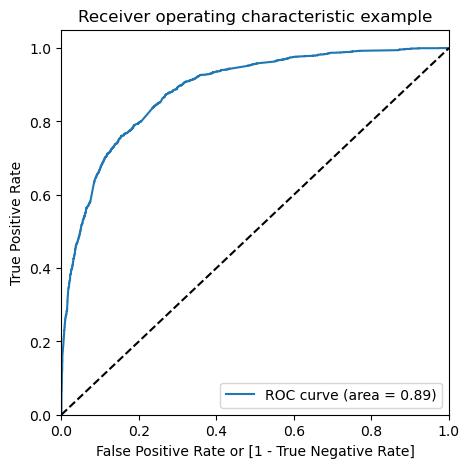

In [88]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### Finding Optimal cutoff point

In [89]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.099330,0,1,0,0,0,0,0,0,0,0,0
1,1,0.987193,1,1,1,1,1,1,1,1,1,1,1
2,0,0.046623,0,1,0,0,0,0,0,0,0,0,0
3,1,0.995015,1,1,1,1,1,1,1,1,1,1,1
4,1,0.053069,0,1,0,0,0,0,0,0,0,0,0


In [90]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383549  1.000000  0.000000
0.1   0.1  0.624173  0.974938  0.405930
0.2   0.2  0.755279  0.917420  0.654397
0.3   0.3  0.785849  0.864010  0.737219
0.4   0.4  0.809486  0.763353  0.838190
0.5   0.5  0.815789  0.698439  0.888804
0.6   0.6  0.807280  0.632293  0.916155
0.7   0.7  0.782698  0.515612  0.948875
0.8   0.8  0.760164  0.423993  0.969325
0.9   0.9  0.713048  0.271159  0.987986


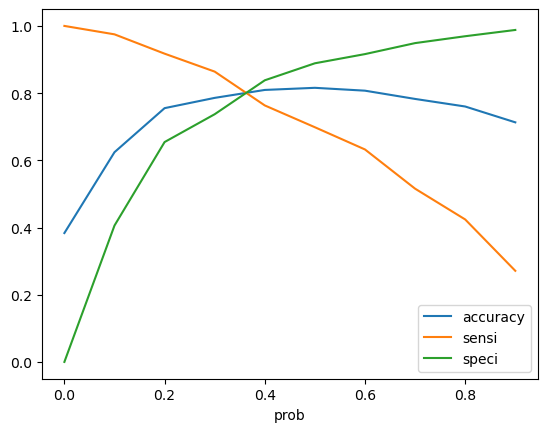

In [91]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From above optimum point is apprx 0.40 as optimum cutoff point

In [92]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.099330,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.987193,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.046623,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.995015,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.053069,0,1,0,0,0,0,0,0,0,0,0,0


In [93]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8094862905767413

In [94]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3279,  633],
       [ 576, 1858]], dtype=int64)

In [95]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6984387838948234

In [96]:
# Let us calculate specificity
TN / float(TN+FP)

0.8888036809815951

In [97]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1111963190184049


In [98]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7962529274004684


In [99]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8256946093564475


In [100]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3477,  435],
       [ 734, 1700]], dtype=int64)

#### Precision
TP / TP + FP

In [101]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7962529274004684

#### Recall
TP / TP + FN

In [102]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6984387838948234

#### Precision and recall tradeoff

In [103]:
from sklearn.metrics import precision_recall_curve

In [104]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       1
 2       0
 3       1
 4       1
        ..
 6341    0
 6342    1
 6343    0
 6344    0
 6345    0
 Name: Converted, Length: 6346, dtype: int64,
 0       0
 1       1
 2       0
 3       1
 4       0
        ..
 6341    0
 6342    1
 6343    0
 6344    0
 6345    0
 Name: predicted, Length: 6346, dtype: int64)

In [105]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

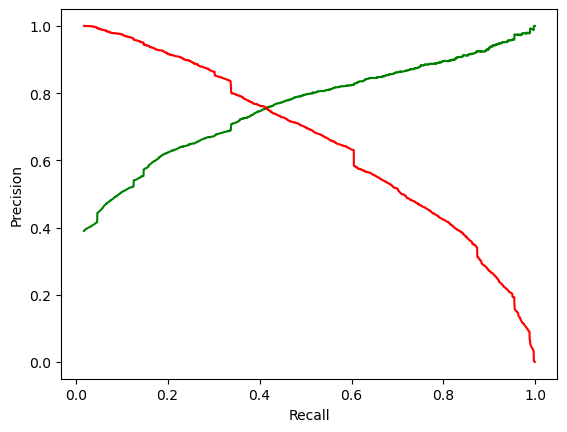

In [106]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

### Lets predict on Test Set

In [107]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3053,0.044619,0,1,0,0,0,0,1,0,0,0,0,1,0
686,0.908569,0,1,0,0,0,0,1,0,0,0,0,1,0
4091,1.664296,0,1,0,0,0,0,0,0,0,0,0,1,0
737,-0.885366,0,0,0,0,0,1,1,0,0,0,0,1,0
4390,-0.118633,0,1,0,0,0,0,0,0,0,0,0,0,0


In [108]:
X_test_sm = sm.add_constant(X_test)

In [109]:
y_test_pred = res.predict(X_test_sm)

In [110]:
y_test_pred[:10]

3053    0.336706
686     0.569925
4091    0.510814
737     0.962385
4390    0.039161
4064    0.125619
7021    0.966627
5415    0.040427
8596    0.956572
3334    0.018044
dtype: float64

In [111]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [112]:
# Let's see the head
y_pred_1.head()

,0
3053,0.336706
686,0.569925
4091,0.510814
737,0.962385
4390,0.039161


In [113]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [114]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [115]:
y_pred_final.head()

,Converted,0
3053,0,0.336706
686,1,0.569925
4091,1,0.510814
737,1,0.962385
4390,0,0.039161


In [116]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [117]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Converted_Prob
3053,0,0.336706
686,1,0.569925
4091,1,0.510814
737,1,0.962385
4390,0,0.039161


In [118]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [119]:
y_pred_final.head()

,Converted,Converted_Prob,final_predicted
3053,0,0.336706,0
686,1,0.569925,1
4091,1,0.510814,1
737,1,0.962385,1
4390,0,0.039161,0


In [120]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8085262771040059

In [121]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1455,  267],
       [ 254,  745]], dtype=int64)

In [122]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [123]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7457457457457457

In [124]:
# Let us calculate specificity
TN / float(TN+FP)

0.8449477351916377

In [125]:
# Precision

TP/float(FP+TP)

0.7361660079051383

In [126]:
# Recall

TP/ float(FN+TP)

0.7457457457457457

In [127]:
# Summary of model

#                 Training parameters      Test parameters
# Accuracy               0.82                   0.81
# Sensitivity            0.70                   0.75
# Specifity              0.89                   0.85
# Precision              0.80                   0.74
# Recall                 0.70                   0.75